# Digit Classifier made with Micrograd

This model is a digit classifier built from scratch using a neural network inspired by [Karpathy's Micrograd](https://github.com/karpathy/micrograd). It was trained on 1000 images that were 14 x 14 in order to save time. This was done without using deep learning libraries like PyTorch or TensorFlow. The model was trained for 3 hours and achieved a 71% accuracy.

### **THIS MODEL HAS NO NUMPY**

## Architecture
- Input: `196` (14 x 14)
- Hidden layers:
    - 64 neurons with `tanh` activation
    - 32 neurons with `tanh` activation
- Output layer: 10 neurons (one per digit)

  ```python
  # Here is the model declaration
  model = MLP(196, [64, 32, 10])

## Loss over 40 epochs
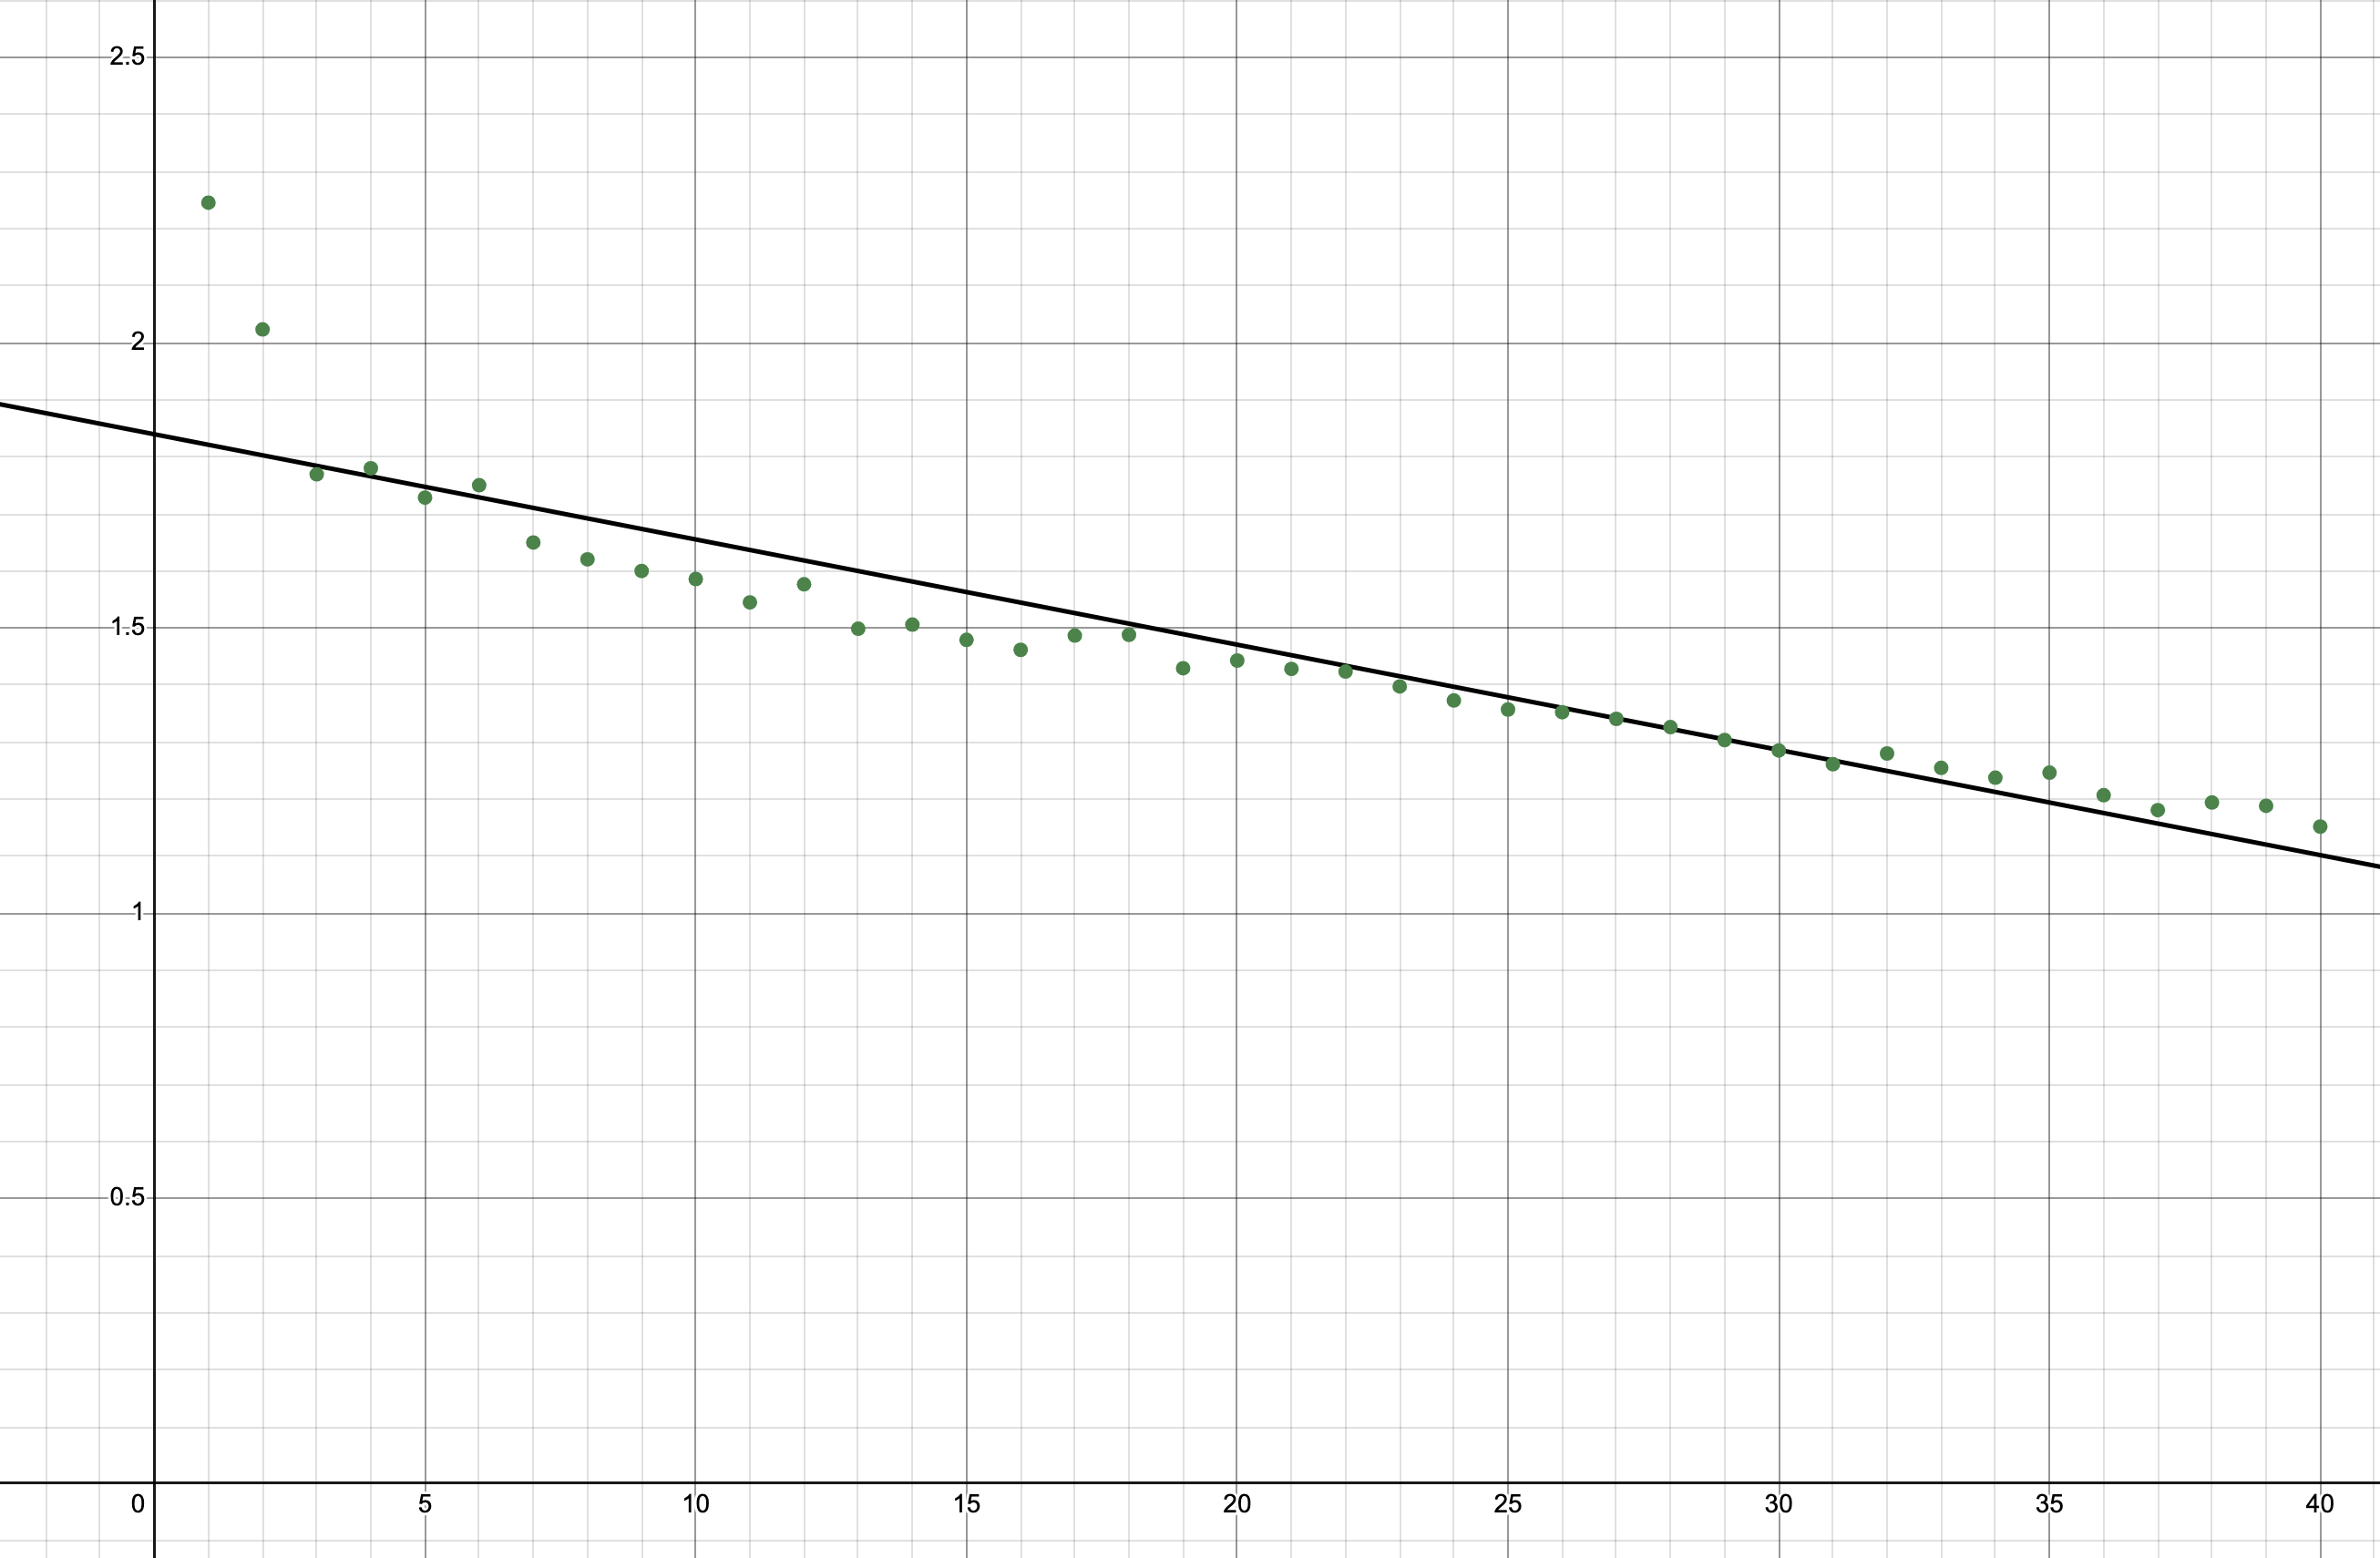

## How to load micrograd model
```python
import os
import pickle

# Load saved parameter values (list of floats)
with open("models/micrograd_model.pkl", "rb") as f:
    saved_params = pickle.load(f)

for p, val in zip(model.parameters(), saved_params):
    p.data = val

In [2]:
import math # used for defining cost function
import random # used for randomizing
from Value import Value # custom object implemented in MLP from Karpathy's Micrograd
from MLP import * # multi layer perceptron backbone of mdodel
from sklearn.datasets import fetch_openml # to access MNIST dataset
import matplotlib.pyplot as plt # To visualize digits
%matplotlib inline

In [3]:
# loading dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0 # normalize pixels
y = y.astype(int)

In [4]:
# splitting data
random.seed(42)
indices = list(range(len(X)))
split = int(0.8 * len(X))
train_idx = indices[:split]
test_idx = indices[split:]

X_train = [X[i] for i in train_idx]
X_test = [X[i] for i in test_idx]
y_train = [y[i] for i in train_idx]
y_test = [y[i] for i in test_idx]


In [5]:
# ie. 4 = [0,0,0,0,1,0,0,0,0,0]
def encode_labels(y):
    one_hot = []
    for label in y:
        vector = [0] * 10
        vector[label] = 1
        one_hot.append(vector)
    return one_hot
y_train_encoded = encode_labels(y_train)
y_test_encoded = encode_labels(y_test)

In [6]:
# Model that will be used
model = MLP(196, [64, 32, 10])

In [7]:
# using cross entropy loss for cost function
def softmax(logits):
    exps = [x.exp() for x in logits]
    sum_exps = sum(exps, Value(0))
    probs = [e / sum_exps for e in exps]
    return probs

def cross_entropy_loss(logits, true_label):
    probs = softmax(logits)
    loss = Value(0)
    for p, t in zip(probs, true_label):
        if t == 1:
            loss -= p.log()
    return loss

In [8]:
# learning rate will decay by 4% each epoch
def optimizer(model, base_lr, e, decay=0.96):
    lr = base_lr * (decay ** e)
    for p in model.parameters():
         p.data += -lr * p.grad

In [ ]:
from PIL import Image

# resizer to compress images
def resize_dataset(X, new_size=(14,14)):
    resized_images = []
    for img_array in X:
        if not isinstance(img_array, Image.Image):
            img = Image.fromarray(img_array)
        else:
            img = img_array
        img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
        resized_images.append(list(img_resized.getdata()))
    return resized_images

In [10]:
# np.ravel in vanilla python
def flatten_2d(lst):
    flat = []
    for row in lst:
        if isinstance(row, (list, tuple)):
            for elem in row:
                flat.append(elem)
        else:
            flat.append(row)
    return flat

In [ ]:
# resized to save time
X_train = resize_dataset(X_train, (14, 14))
X_test = resize_dataset(X_test, (14, 14))
X_train = X_train[:1000]
y_train_encoded = y_train_encoded[:1000]
epochs = 40
for epoch in range(epochs):
    
    total_loss = 0
    for x, y_true in zip(X_train, y_train_encoded):
        # forward pass
        x_val = [Value(xi) for xi in flatten_2d(x)]
        y_pred = model(x_val)
        loss = cross_entropy_loss(y_pred, y_true)

        # zero gradients
        model.zero_grad()

        # backward pass
        loss.backward()

        # update weights
        optimizer(model, base_lr=0.2, e=epoch)
        total_loss += loss.data

    print(f"Epoch: {epoch + 1}, Loss: {total_loss / len((X_train))}")

Epoch: 26, Loss: 1.3524259108072207
Epoch: 27, Loss: 1.340797374785405
Epoch: 28, Loss: 1.3262896825932062
Epoch: 29, Loss: 1.3036682211355057
Epoch: 30, Loss: 1.2853805441742288
Epoch: 31, Loss: 1.2613890733299704
Epoch: 32, Loss: 1.2800803802391847
Epoch: 33, Loss: 1.2548047463885272
Epoch: 34, Loss: 1.2377037367228227
Epoch: 35, Loss: 1.246479296332746
Epoch: 36, Loss: 1.2069004677443043
Epoch: 37, Loss: 1.180867781070629
Epoch: 38, Loss: 1.1941594524635193
Epoch: 39, Loss: 1.1883555695244263
Epoch: 40, Loss: 1.1519569070785027


In [17]:
# achieved 71% accuracy
correct = 0
total = len(X_test[:1000])
X_test_resized = resize_dataset(X_test, (14, 14))

for x, y_true in zip(X_test_resized[:1000], y_test[:1000]):
    x_vals = [Value(xi) for xi in flatten_2d(x)]
    y_pred = model(x_vals)
    pred_label = np.argmax([p.data for p in y_pred])
    
    if pred_label == y_true:
        correct += 1

accuracy = correct / total
print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 74.60%


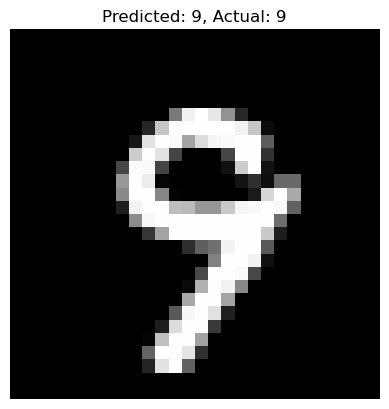

In [16]:
import matplotlib.pyplot as plt

i = 3
X_test_resized = resize_dataset(X_test, (14, 14))
img_resized = X_test_resized[i]
img = X_test[i]
label = y_test[i]

# Predict
x_vals = [Value(xi) for xi in flatten_2d(img_resized)]
y_pred = model(x_vals)
pred_label = max(range(len(y_pred)), key=lambda i: y_pred[i].data)


plt.imshow(img.reshape(28, 28), cmap='gray')  
plt.title(f"Predicted: {pred_label}, Actual: {label}")
plt.axis('off')
plt.show()

In [41]:
import pickle
import os
os.makedirs("models", exist_ok=True)

params = [p.data for p in model.parameters()]
with open("models/micrograd_model.pkl", "wb") as f:
    pickle.dump(params, f)
print("Model saved")

Model saved


## Digit Classifier made with PyTorch

In [ ]:
# imports
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Models

In [11]:
import os
import pickle

# Load saved parameter values (list of floats)
with open("models/micrograd_model.pkl", "rb") as f:
    saved_params = pickle.load(f)

for p, val in zip(model.parameters(), saved_params):
    p.data = val